In [1]:
import pandas as pd
from relative_path import TRACK_DATA, ARTIST_DATA

from pandas import DataFrame, Series
from typing import List, Dict

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from visualization import VisualizeRelational

## Standard

In [2]:
df_tracks =     pd.read_parquet(TRACK_DATA)
df_artists =    pd.read_parquet(ARTIST_DATA)

In [3]:
df_tracks.sort_values(by="popularity", ascending=False, inplace=True)
df_tracks.reset_index(drop=True, inplace=True)

In [4]:
# Checking and processing the DATATYPES. 
df_tracks["dates"] = pd.to_datetime(df_tracks["release_date"])
df_tracks["release_date"] = pd.to_datetime(df_tracks["release_date"])
df_tracks["year"]=df_tracks["release_date"].dt.year

df_tracks.drop(['release_date', 'dates'], axis=1, inplace=True)

In [5]:
sample = VisualizeRelational(input_df=df_tracks, name="Tracks", x="year", y="popularity", export_plot=True, show_plot=False)

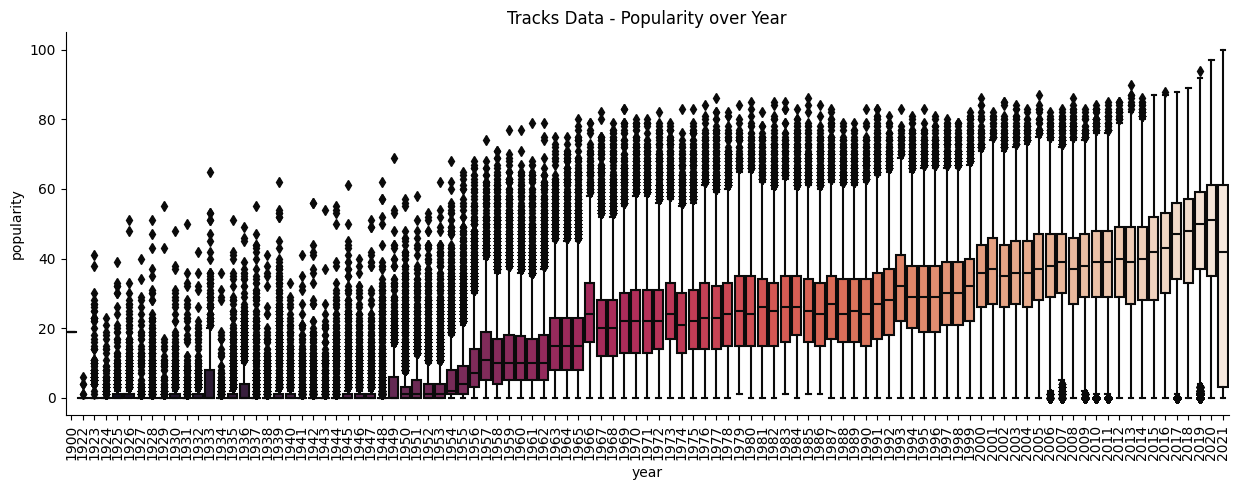

In [6]:
sample.BoxPlot(show=True)

/Users/mavwong/Desktop/Github/SpotifyDataAnalysis/visualization.py:124: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



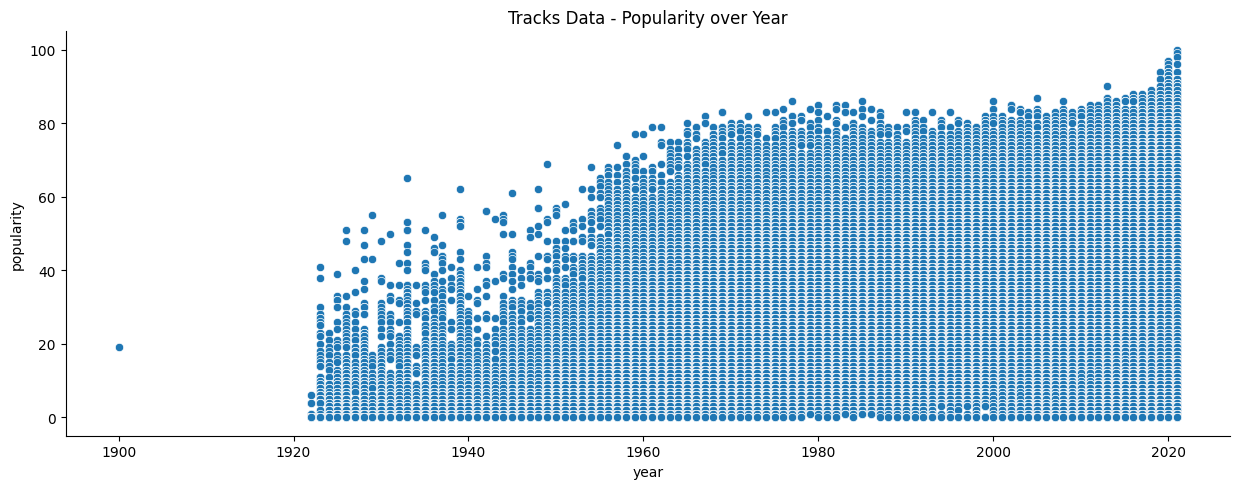

In [7]:
sample.ScatterPlot(show=True)

/Users/mavwong/Desktop/Github/SpotifyDataAnalysis/visualization.py:103: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




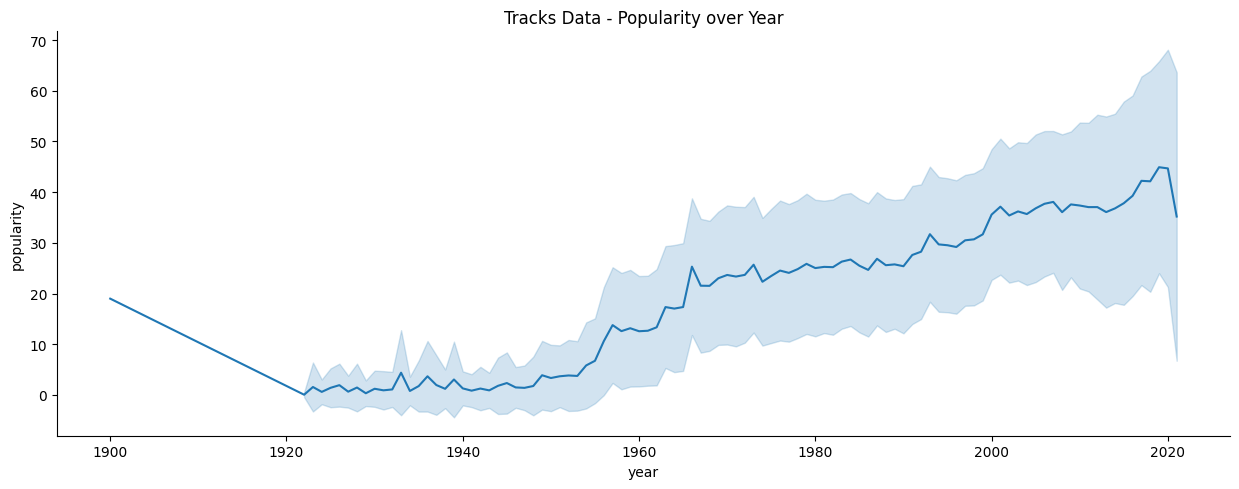

In [8]:
sample.LinePlot(show=True)

In [9]:
### Track Dataframe
# Track Popularity over time / year - distribution, boxplot. (Render the top 10, 100 and 1000, )
# Extract - Top solo artists vs Top various artists

### Artists Dataframe
# Artist Popularity over Artist Followers
# Frequency of genres, relative to the top artist. (Top 10% and Top 25%, Top 10 and 100)


###  Combination of Track and Artists Dataframe
# Track Popularity over Total Artists Followers, Track Popularity over Average Artists Popularity